In [1]:
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import feature_detection
import utils

In [2]:
img_list = utils.load_images('../input_image/parrington')

In [3]:
cylinder_img_list = [utils.cylindrical_projection(img, 706) for img in img_list]

In [31]:
cm = feature_detection.harris_corner(img_list[0])

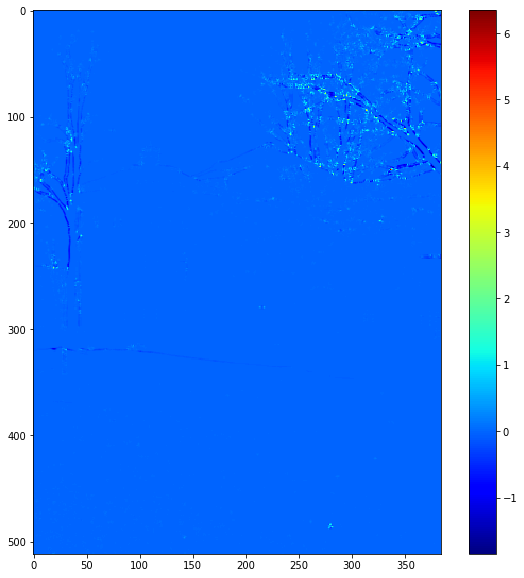

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='jet')
plt.colorbar()
plt.show()

In [95]:
def extract_description(img, corner_response, threshold=0.01):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corner_neibor = np.zeros(shape=gray.shape, dtype=np.uint8)
    features = np.zeros(shape=gray.shape, dtype=np.uint8)
    features[corner_response > threshold*corner_response.max()] = 255
    
    #plt.figure(figsize=(10,10))
    #plt.imshow(features, cmap='gray')
    #plt.colorbar()
    #plt.show()
    
    feature_descriptions = np.array([[0,0,0,0,0,0,0,0,0]])
    
    height, width, _ = img.shape
    for y in range(1, height-1):
        for x in range(1, width-1):
            if features[y][x] == 255:
                desc = gray[y-1:y+2, x-1:x+2]
                corner_neibor[y-1:y+2, x-1:x+2] = desc
                feature_descriptions = np.append(feature_descriptions, [desc.flatten()], axis=0)
                
    return feature_descriptions[1:], corner_neibor
                

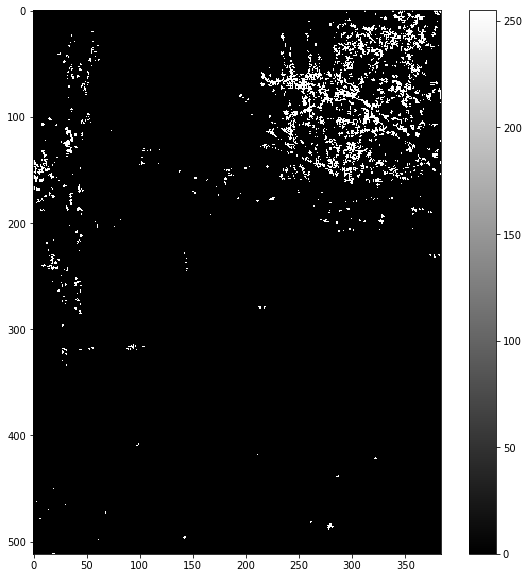

In [96]:
descs, n = extract_description(img_list[0], cm)

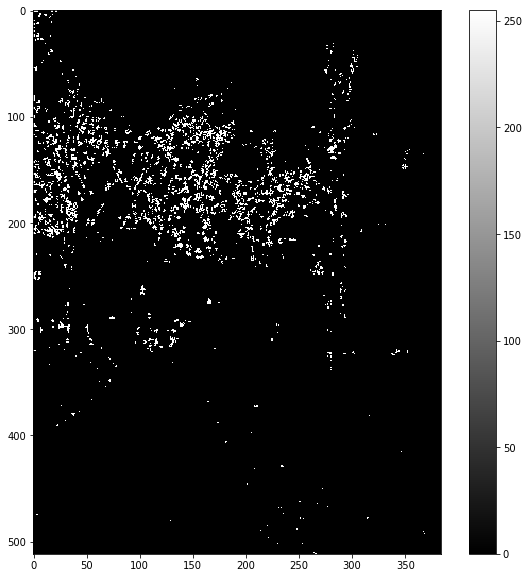

In [99]:
cm2 = feature_detection.harris_corner(img_list[1])
descs2, n2 = extract_description(img_list[1], cm2)